In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5)})
# Seed random number generator
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)

In [2]:
import networkx as nx
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [44]:


dfnodes = pd.read_excel('Nodes.xlsx', index_col='id')
print (dfnodes)


                   city   latitude  longitude  demand
id                                                   
1              Duisburg  51.435146   6.762692  164.60
2   Mülheim an der Ruhr  51.433334   6.883333   57.10
3                 Essen  51.450832   7.013056  189.92
4             Dortmund   51.514244   7.468429  188.87
5       Castrop Rauxel   51.553768   7.311080   24.42
6                Herne   51.538521   7.219260   51.81
7        Gelsenkirchen   51.511532   7.093030   85.75
8               Bottrop  51.522160   6.924250   39.59
9            Oberhausen  51.496334   6.863776   70.61
10            Dinslaken  51.567426   6.747534   22.50
11                 Hamm  51.673858   7.815981   59.08
12               Voerde  51.597030   6.683333   11.94
13                Wesel  51.664307   6.629567   20.05
14                Hünxe  51.641119   6.767616    4.56
15              Dorsten  51.655968   6.964260   24.90
16      Haltern am See   51.744641   7.182979   12.82
17              Datteln  51.

In [45]:

dfedges = pd.read_excel('Edges.xlsx')
print (dfedges)

    Source  Target  Distance  Time  Price
0        1       2         9  0.74   0.30
1        1       9         3  0.25   0.09
2        1      10        43  3.24   1.29
3        1      22        71  4.08   2.13
4        3       7         6  0.90   0.18
5        3       8         2  0.25   0.06
6        3       9        11  0.90   0.33
7        4       5        21  1.22   0.63
8        4      19        20  1.27   0.60
9        5       6         3  0.50   0.09
10       6       7        13  1.28   0.39
11       7       8         8  0.71   0.24
12       8       9         9  0.90   0.27
13      10      12         1  0.08   0.03
14      11      18        26  2.48   0.78
15      12      20        38  4.33   1.14
16      13      14        13  2.01   0.39
17      13      21        25  1.08   0.75
18      13      22        31  1.23   0.93
19      14      15        17  2.07   0.51
20      15      20        11  1.03   0.33
21      16      17        10  1.32   0.30
22      16      20        17  1.52

In [46]:
G = nx.from_pandas_edgelist(dfedges, 'Source','Target',['Distance', 'Time','Price'],create_using=nx.Graph)

In [47]:
print(dfnodes)

                   city   latitude  longitude  demand
id                                                   
1              Duisburg  51.435146   6.762692  164.60
2   Mülheim an der Ruhr  51.433334   6.883333   57.10
3                 Essen  51.450832   7.013056  189.92
4             Dortmund   51.514244   7.468429  188.87
5       Castrop Rauxel   51.553768   7.311080   24.42
6                Herne   51.538521   7.219260   51.81
7        Gelsenkirchen   51.511532   7.093030   85.75
8               Bottrop  51.522160   6.924250   39.59
9            Oberhausen  51.496334   6.863776   70.61
10            Dinslaken  51.567426   6.747534   22.50
11                 Hamm  51.673858   7.815981   59.08
12               Voerde  51.597030   6.683333   11.94
13                Wesel  51.664307   6.629567   20.05
14                Hünxe  51.641119   6.767616    4.56
15              Dorsten  51.655968   6.964260   24.90
16      Haltern am See   51.744641   7.182979   12.82
17              Datteln  51.

In [48]:
dfnodes.columns

Index(['city', 'latitude', 'longitude', 'demand'], dtype='object')

In [49]:
nx.set_node_attributes(G, dfnodes['city'], 'city')
nx.set_node_attributes(G, dfnodes['demand'], 'demand')
nx.set_node_attributes(G, dfnodes['latitude'], 'lat')
nx.set_node_attributes(G, dfnodes['longitude'], 'long')

In [50]:
import math
pos = dict()
for v in G.nodes:
    long = G.nodes[v]['long']
    lat = G.nodes[v]['lat']
    pos[v] = ((long + 90) * math.cos(2 * math.pi * lat / 360), lat)
    #print(pos[v])

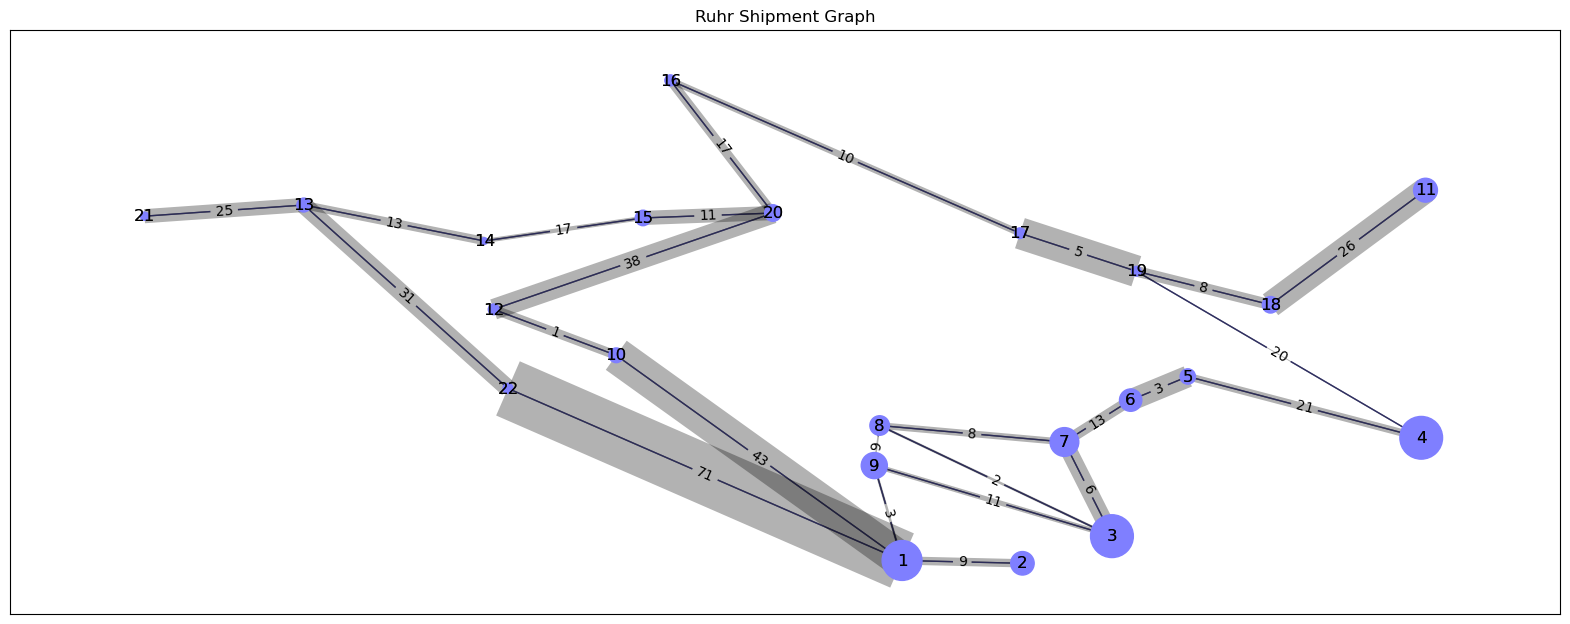

In [51]:
# Draw network 

d = dict(dfnodes['demand'])
#pos = nx.spring_layout(G, seed=7) 
fig = plt.figure(figsize=(20,20))
plt.title('Ruhr Shipment Graph')
ax = plt.subplot(1, 1, 1)
nx.draw_networkx(G, pos=pos, nodelist=d.keys(), node_size=[v * 5 for v in d.values()], node_color='#7f7fff')
for e in G.edges:
    nx.draw_networkx_edges(
        G, pos=pos, edgelist=[e],edge_color='#7f7fff', alpha=0.5, arrows=False)
ax.set_aspect(1)
nx.draw_networkx_labels(G,pos, alpha=0.7)
labels = nx.get_edge_attributes(G,'Distance') # Label on the edges are distances
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G , pos = pos, width=dfedges['Price']*20, alpha=0.3) #edge width represents price
fig.savefig('ruhr shipment graph')
plt.show()

In [19]:
#returns frequency for degree 0, 1,2...
nx.degree_histogram(G)

[0, 3, 11, 7, 1]

In [87]:
list(nx.center(G,weight='Distance')) # centers of the graph

[20]

In [88]:
nx.average_degree_connectivity(G, weight="Distance")

{4: 1.9523809523809523, 1: 2.716666666666667, 3: 2.20703125, 2: 2.895}

In [80]:
degree_centrality=nx.degree_centrality(G)
df=pd.DataFrame.from_dict(degree_centrality, orient='index')
df.rename(columns={0:'degree'}, inplace=True)


betweenness_centrality=nx.betweenness_centrality(G)
df['between']=betweenness_centrality


closeness_centrality=nx.closeness_centrality(G)
df['closeness']=closeness_centrality
df.to_csv('centrality')
df

,degree,between,closeness
1,0.190476,0.359524,0.287671
2,0.047619,0.000000,0.225806
9,0.142857,0.233333,0.269231
10,0.095238,0.166667,0.276316
22,0.095238,0.140476,0.247059
3,0.142857,0.080952,0.256098
7,0.142857,0.176190,0.244186
8,0.142857,0.080952,0.256098
4,0.095238,0.152381,0.230769
5,0.095238,0.147619,0.228261


In [23]:
path = nx.shortest_path(G, 1, 19, weight="Distance")
print(path)

[1, 9, 8, 7, 6, 5, 4, 19]


In [86]:
for v in G.nodes:
    for u in G.nodes:
        if u<=v: continue
        print('shortest path between ', v ,'and' , u)
        path=nx.shortest_path(G, u,v, weight='Distance')
        print(path)

shortest path between  1 and 2
[2, 1]
shortest path between  1 and 9
[9, 1]
shortest path between  1 and 10
[10, 1]
shortest path between  1 and 22
[22, 1]
shortest path between  1 and 3
[3, 9, 1]
shortest path between  1 and 7
[7, 3, 9, 1]
shortest path between  1 and 8
[8, 9, 1]
shortest path between  1 and 4
[4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 5
[5, 6, 7, 3, 9, 1]
shortest path between  1 and 19
[19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 6
[6, 7, 3, 9, 1]
shortest path between  1 and 12
[12, 10, 1]
shortest path between  1 and 11
[11, 18, 19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 18
[18, 19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1 and 20
[20, 12, 10, 1]
shortest path between  1 and 13
[13, 22, 1]
shortest path between  1 and 14
[14, 15, 20, 12, 10, 1]
shortest path between  1 and 21
[21, 13, 22, 1]
shortest path between  1 and 15
[15, 20, 12, 10, 1]
shortest path between  1 and 16
[16, 17, 19, 4, 5, 6, 7, 8, 9, 1]
shortest path between  1